In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('health_care.csv')

In [3]:
df.head()

,patient_name,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,gender,bmi,smoker,...,kidney_function,mental_health_score,infection_risk,diagnosis,treatment_outcome,treatment_start,treatment_end,adherence_level,hospital_stay_days,medication
0,Fatma Hassan,54,140.0,166.0,0,74,36.7,Female,31.2,0,...,75,1,Low,Liver Disease,Deteriorated,2023-05-22,2023-07-02,Medium,8,NaN
1,Hana Mostafa,84,116.0,234.0,0,88,38.0,Female,31.5,0,...,69,10,High,Healthy,Recovered,2023-05-22,2023-07-02,Medium,2,No Drug
2,Fatma Hassan,74,147.0,265.0,0,76,37.7,Female,32.1,0,...,89,6,Medium,Kidney Disease,Deteriorated,2023-09-20,2024-12-20,Medium,22,Lisinopril
3,Yassin Mahmoud,80,125.0,262.0,0,90,36.2,Female,31.9,1,...,85,1,Low,Heart Disease,Ongoing,2024-03-24,2024-04-02,Low,28,Lisinopril
4,Laila Hassan,74,133.0,153.0,0,84,37.3,Male,37.5,0,...,72,3,Low,Liver Disease,Deteriorated,2024-12-06,2025-03-13,Medium,29,Statins


In [4]:
df.describe()

,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,bmi,smoker,exercise_per_week,hospital_visits,blood_sugar,liver_function,kidney_function,mental_health_score,hospital_stay_days
count,5000.000000,4750.000000,4650.000000,5000.000000,5000.000000,5000.00000,4700.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.828200,129.740421,209.394194,0.206400,79.403400,37.26418,28.012128,0.302600,3.12980,4.623800,129.848020,49.247760,74.153800,5.088400,12.234000
std,20.376264,15.078059,29.164240,0.404761,9.660255,0.72445,5.107462,0.459429,2.13529,3.266926,31.730374,21.675851,19.630232,2.425647,9.350355
min,20.000000,90.000000,150.000000,0.000000,60.000000,36.00000,18.500000,0.000000,0.00000,0.000000,80.000000,10.000000,30.000000,1.000000,0.000000
25%,37.000000,119.000000,188.000000,0.000000,73.000000,36.60000,24.300000,0.000000,1.00000,2.000000,104.450000,32.000000,60.000000,3.000000,4.000000
50%,54.000000,130.000000,209.000000,0.000000,79.000000,37.30000,27.900000,0.000000,3.00000,4.000000,124.700000,49.250000,74.000000,5.000000,10.000000
75%,73.000000,140.000000,230.000000,0.000000,86.000000,37.90000,31.500000,1.000000,5.00000,8.000000,152.325000,66.900000,88.000000,7.000000,20.000000
max,90.000000,180.000000,300.000000,1.000000,117.000000,38.50000,40.000000,1.000000,7.00000,10.000000,199.800000,100.000000,120.000000,10.000000,30.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_name         5000 non-null   object 
 1   age                  5000 non-null   int64  
 2   blood_pressure       4750 non-null   float64
 3   cholesterol          4650 non-null   float64
 4   diabetes             5000 non-null   int64  
 5   heart_rate           5000 non-null   int64  
 6   temperature          5000 non-null   float64
 7   gender               5000 non-null   object 
 8   bmi                  4700 non-null   float64
 9   smoker               5000 non-null   int64  
 10  exercise_per_week    5000 non-null   int64  
 11  alcohol_intake       2521 non-null   object 
 12  hospital_visits      5000 non-null   int64  
 13  blood_sugar          5000 non-null   float64
 14  liver_function       5000 non-null   float64
 15  kidney_function      5000 non-null   i

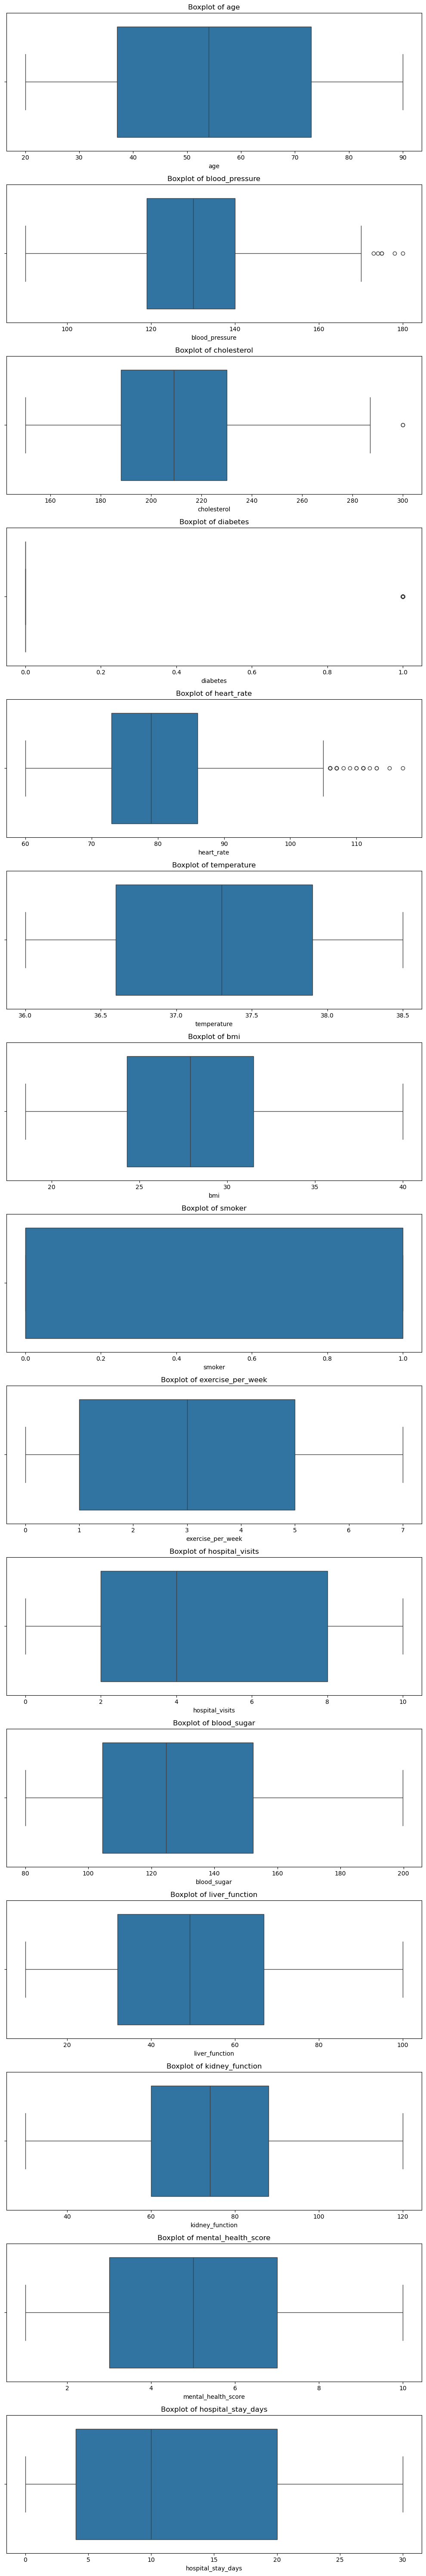

In [5]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [6]:
string_cols = df.select_dtypes(include=['object', 'string']).columns
cols = string_cols.difference(['patient_name', 'treatment_start', 'treatment_end'])

for col in cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'adherence_level':
['Medium' 'Low' 'High']

Unique values in 'alcohol_intake':
[nan 'Low' 'High' 'Moderate']

Unique values in 'diagnosis':
['Liver Disease' 'Healthy' 'Kidney Disease' 'Heart Disease' 'Diabetes'
 'Hypertension']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'infection_risk':
['Low' 'High' 'Medium']

Unique values in 'medication':
[nan 'No Drug' 'Lisinopril' 'Statins' 'Metformin' 'Beta Blockers']

Unique values in 'treatment_outcome':
['Deteriorated' 'Recovered' 'Ongoing']


In [7]:
df.isnull().sum()

patient_name              0
age                       0
blood_pressure          250
cholesterol             350
diabetes                  0
heart_rate                0
temperature               0
gender                    0
bmi                     300
smoker                    0
exercise_per_week         0
alcohol_intake         2479
hospital_visits           0
blood_sugar               0
liver_function            0
kidney_function           0
mental_health_score       0
infection_risk            0
diagnosis                 0
treatment_outcome         0
treatment_start         150
treatment_end             0
adherence_level           0
hospital_stay_days        0
medication              401
dtype: int64

In [8]:
df["treatment_start"] = pd.to_datetime(df["treatment_start"], errors="coerce")
df["treatment_end"] = pd.to_datetime(df["treatment_end"], errors="coerce")


In [9]:
# dropna in treatment start column
df = df.dropna(subset=['treatment_start'])
df['treatment_duration'] = (df['treatment_end'] - df['treatment_start']).dt.days

# fillna in blood pressure column
df["blood_pressure"] = df.groupby("gender")["blood_pressure"].transform(lambda x: x.fillna(x.mean()))
# fillna in cholesterol column
df["cholesterol"] = df.groupby("gender")["cholesterol"].transform(lambda x: x.fillna(x.median()))
# fillna in bmi column
df["bmi"] = df.groupby("gender")["bmi"].transform(lambda x: x.fillna(x.median()))
# fillna in alcohol_intake column
df["alcohol_intake"] = df["alcohol_intake"].fillna("Low")
# fillna in medication column
df['medication'] = df['medication'].fillna('unknown')



In [10]:
df.isnull().sum()

patient_name           0
age                    0
blood_pressure         0
cholesterol            0
diabetes               0
heart_rate             0
temperature            0
gender                 0
bmi                    0
smoker                 0
exercise_per_week      0
alcohol_intake         0
hospital_visits        0
blood_sugar            0
liver_function         0
kidney_function        0
mental_health_score    0
infection_risk         0
diagnosis              0
treatment_outcome      0
treatment_start        0
treatment_end          0
adherence_level        0
hospital_stay_days     0
medication             0
treatment_duration     0
dtype: int64

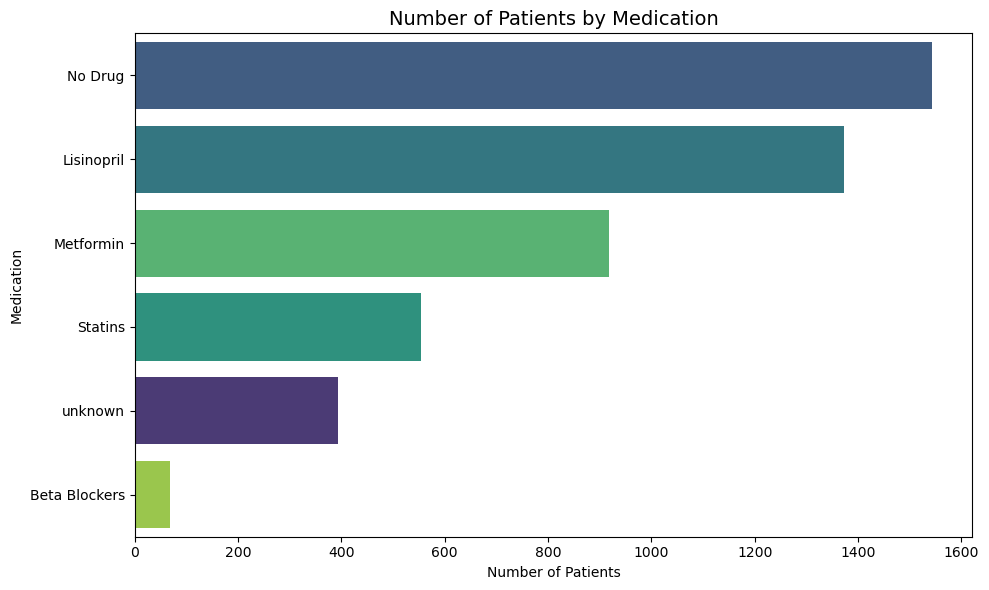

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='medication',
    hue='medication',
    data=df,
    order=df['medication'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Number of Patients by Medication', fontsize=14)
plt.xlabel('Number of Patients')
plt.ylabel('Medication')
plt.tight_layout()
plt.show()


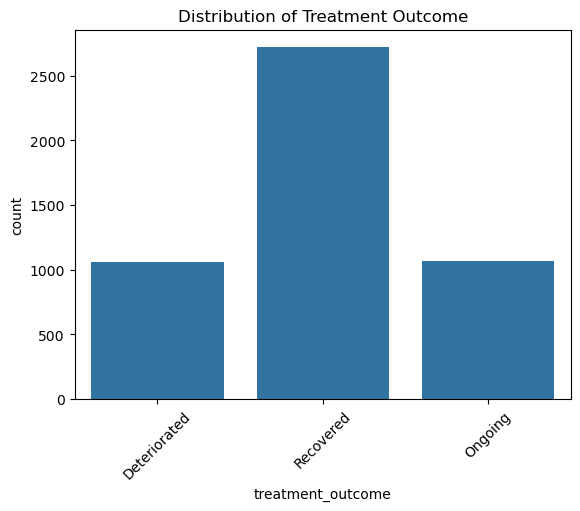

In [12]:
#حالة الناس الخارجة من المستشفي
sns.countplot(x='treatment_outcome', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Treatment Outcome")
plt.show()


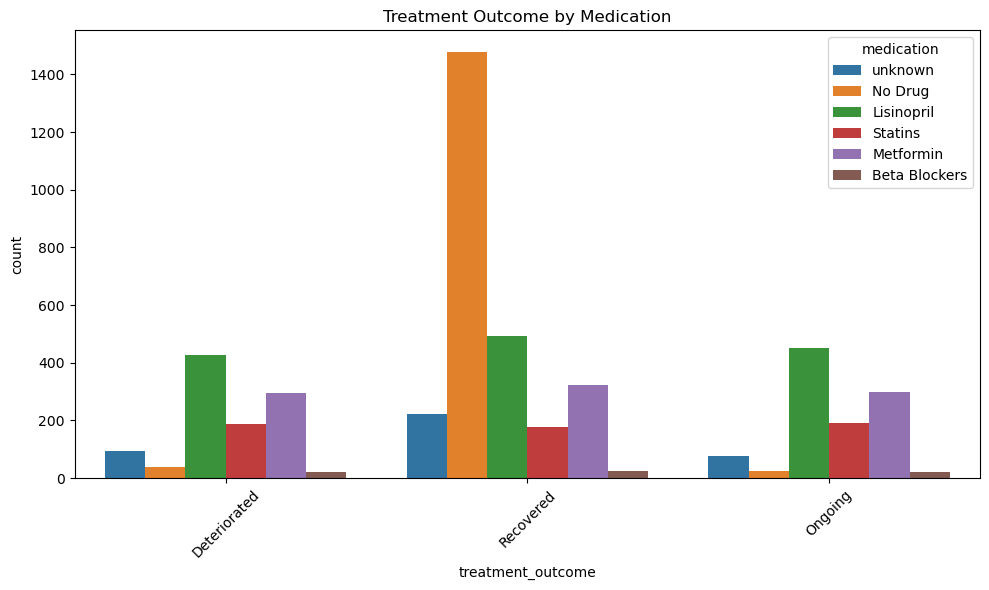

In [13]:
# علاقة بين نوع الدواء و نتيجة العلاج
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment_outcome', hue='medication')
plt.title("Treatment Outcome by Medication")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


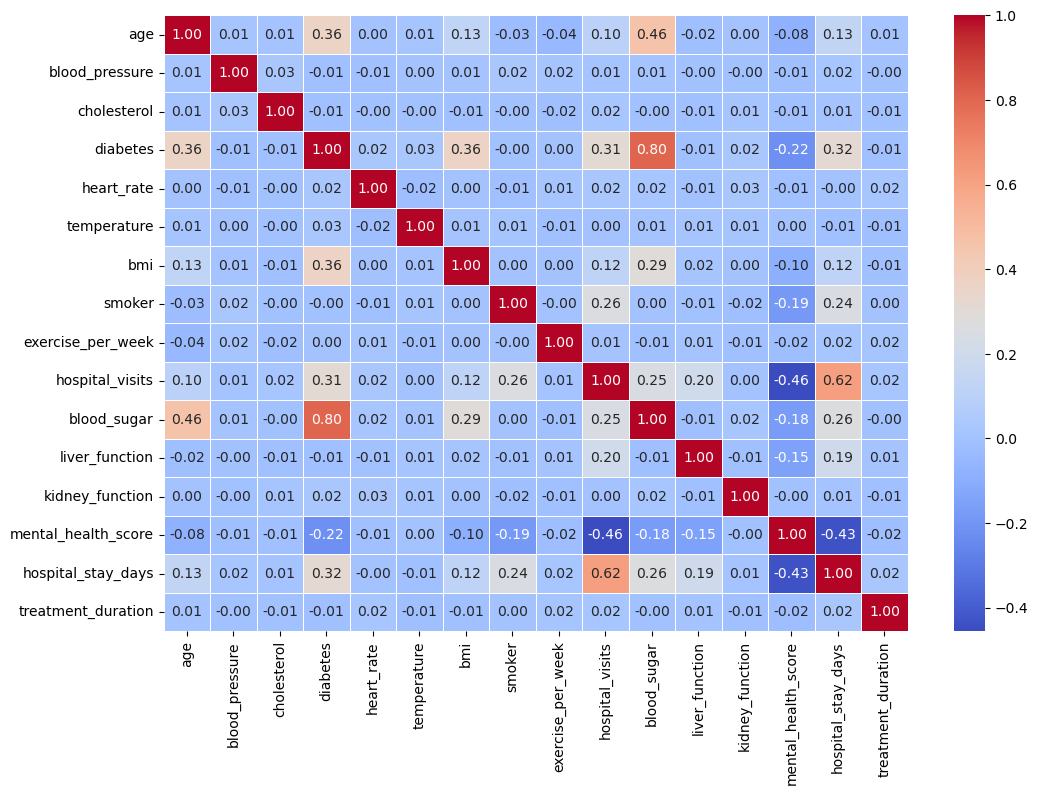

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.show()
#من الصورة تحت 
#في ترابط بين عمود blood_sugar& diabetes بمعامل 0.8
#hospital_visits & hospital_stay_days معامل 0.62
# age & blood_sugar  0.46
# haspital_visits & mental_health_score -0.46
#mental_health_score & hospital_stay_days -0.43

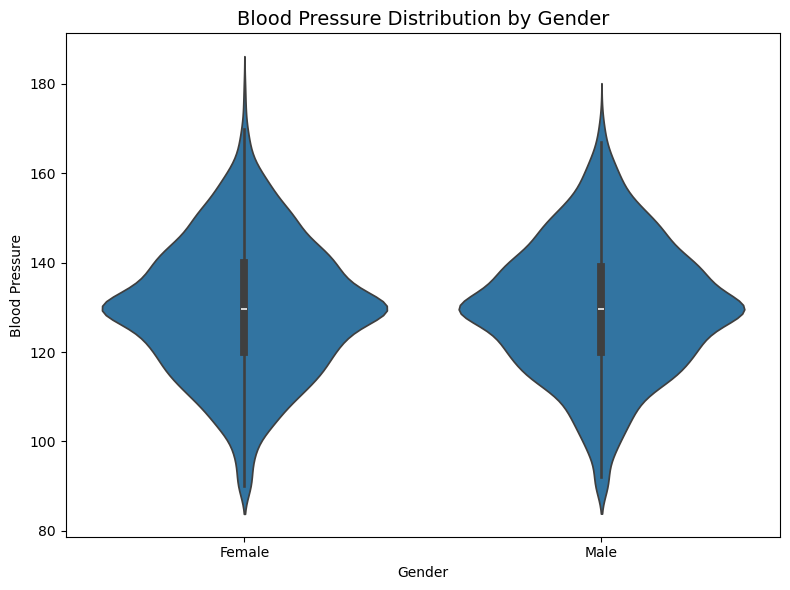

In [15]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='blood_pressure', data=df)
plt.title("Blood Pressure Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Blood Pressure")
plt.tight_layout()
plt.show()


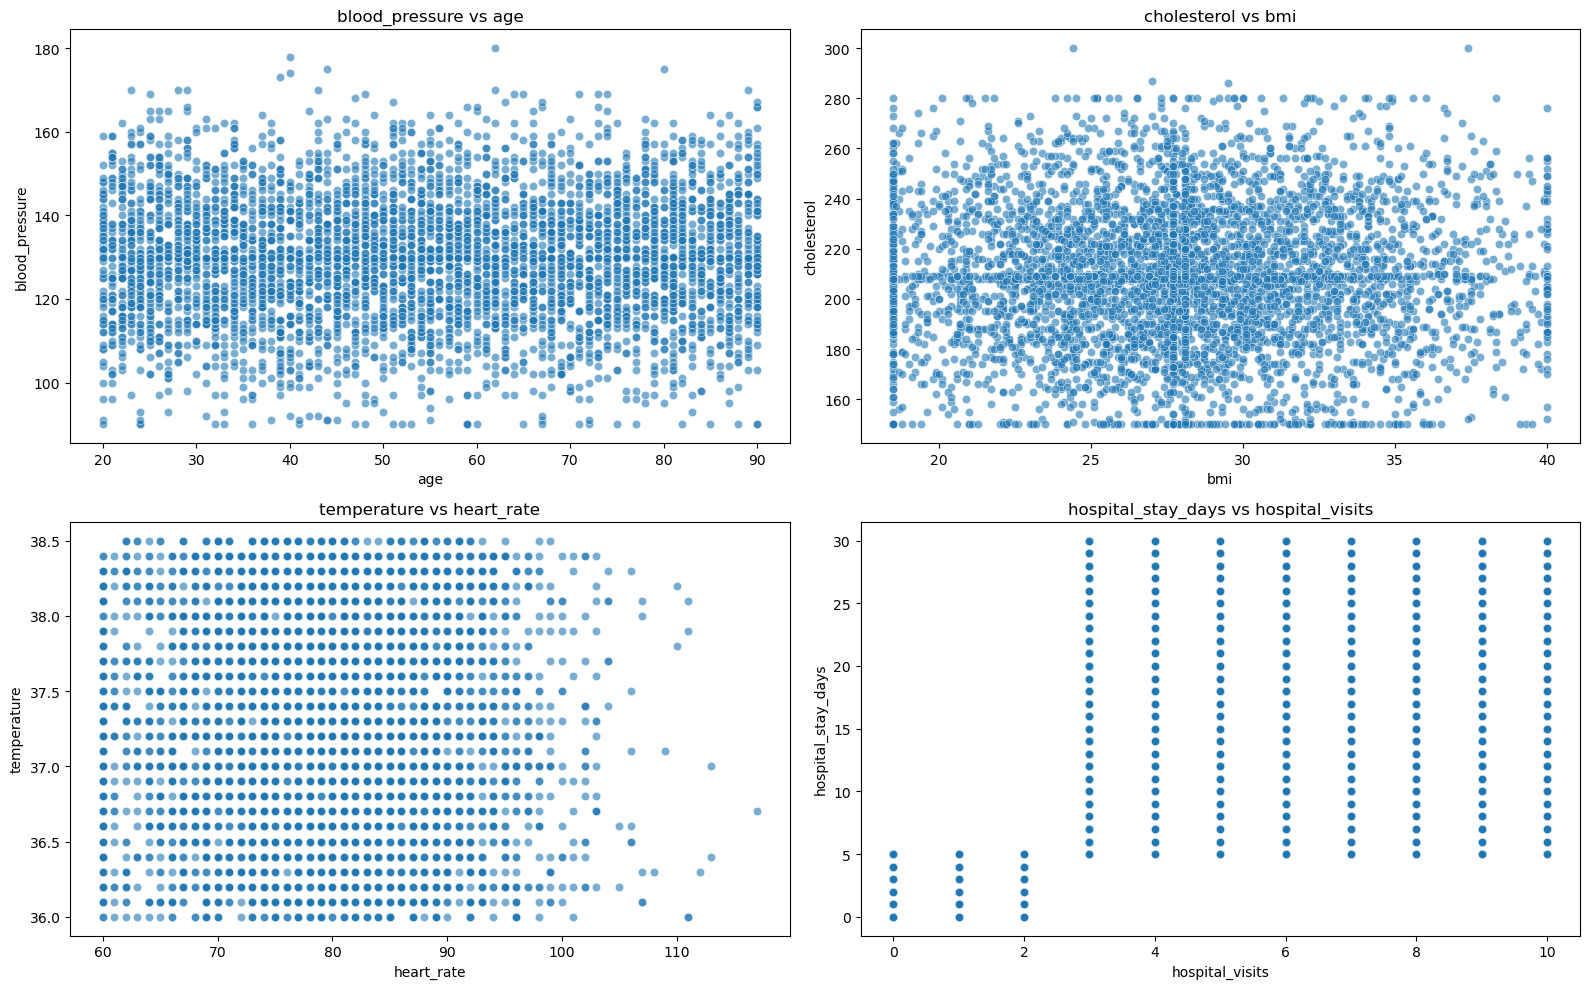

In [16]:

scatter_pairs = [
    ('age', 'blood_pressure'),
    ('bmi', 'cholesterol'),
    ('heart_rate', 'temperature'),
    ('hospital_visits', 'hospital_stay_days')
]
plt.figure(figsize=(16, 10))
for i, (x_col, y_col) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.6)
    plt.title(f'{y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()
